# Project: Tmdb-Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my Data Analysis project, I have selected the TMDb movies database file which has details of about 10k+ movies including details of their budget, revenue, cast and etc. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. The final two columns ending with “\_adj” show the budget and revenue of the" "associated movie in terms of 2010 dollars, accounting for inflation over time. 
  
**The questions to be explored are:**  
1. Which movie had the highest and lowest budget?  
2. Which movie had the highest and lowest revenues?
3. Which movie had the highest and lowest profit?
4. What are the characteristics of successful movies?
5. Are there any relationship between budget and profit?

From the above questions I would like to answer the following question as a conclusion.  

**Question: If I wanted to make a movie and if I were to increase the chance of that movie to make profit what will I do?**  


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

From the dataset, as insepected in the codes below, we can see the following things.<br>
* The columns, 'budget', 'revenue', 'budget_adj', 'revenue_adj' has no currency but for this dataset, it will be assumed as US dollars.  
* "vote_count" is different for all the movies, so we cannot directly judge the popularity of the movies based on the "vote_average".  
* "imdb_id", "cast", "homepage", "director", "tagline", "keywords", "overview",  "genres", "production_companies" have missing data. Some are unnecessary for data analysis so some will be deleted and some will be treated.  
* There is one duplicate in the data which needs to handled.  
* Some movies in the database have zero budget, zero revenue, zero budget_adj, zero revenue_adj (value has not been recorded so we will be discarding such entries).
* Zero in "runtime" column needs to be handled.
* Delete columns "id", "imdb_id", "popularity", "homepage", "tagline", "keywords", "overview", "production_companies", "release_date", "vote_count", "vote_average".
* "budget_adj" and "revenue_adj" has a data type of float64 but needs to be changed to int data type.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Load the csv file "tmdb-movies.csv" and storing it into a dataframe.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Print the first 3 rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Print the last 3 rows of the dataset
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# Check the general information regarding the dataset. Check for missing values and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Check if there a re any duplicated rows.
df.duplicated().sum()

1

In [7]:
# Check the statistical description of the dataframe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

**1. Deleteing the unnecessary columns.**  
   Columns to delete: id, imdb_id, popularity, homepage, tagline, overview, production_companies, release_date, vote_count, vote_average

In [8]:
# Delete unnecessary columns
df.drop(['id','imdb_id','popularity','homepage','tagline','keywords','overview','production_companies','release_date','vote_count','vote_average'], axis=1, inplace=True)

# Confirm the change
df.head(1)

,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


**2. Deleteing duplicated row.**  
Since we know that there are 10866 entries and 1 duplicate row, the end result should give us 10865 entries (rows).

In [9]:
# Removing of the duplicate row by keeping the first row of the duplicates
df.drop_duplicates(keep='first', inplace=True)

# Confirm the change
df.shape

(10865, 10)

**3. Handling the missing data for "cast", "director", "genre" columns**  
Since the data types for these columns are string, we cannot replace these with mean values. So replace those values with a common string type to indicate that there is no record for the missing values.

In [10]:
# Replace the NaN values with 'no_record'
df.fillna('no_record', inplace=True)

# Confirm the change
df.isnull().any().any()

False

**4.Removing rows that have zero for "budget", "revenue", "budget_adj", "revenue_adj"**  
Since the resulting data frame should not contain any zero values , instead of removing them I decided to extract the non-zero rows.

In [11]:
# extract all the data which is not zero
df = df[df.budget != 0]
df = df[df.revenue != 0]
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

# Confirm that there is no zero in the respective columns
print(df[df.budget == 0])
print(df[df.revenue == 0])
print(df[df.budget_adj == 0])
print(df[df.revenue_adj == 0])

Empty DataFrame
Columns: [budget, revenue, original_title, cast, director, runtime, genres, release_year, budget_adj, revenue_adj]
Index: []
Empty DataFrame
Columns: [budget, revenue, original_title, cast, director, runtime, genres, release_year, budget_adj, revenue_adj]
Index: []
Empty DataFrame
Columns: [budget, revenue, original_title, cast, director, runtime, genres, release_year, budget_adj, revenue_adj]
Index: []
Empty DataFrame
Columns: [budget, revenue, original_title, cast, director, runtime, genres, release_year, budget_adj, revenue_adj]
Index: []


**5. Handling the zero in 'runtime'**  

In [12]:
# Replace 0 with NaN 
df['runtime'] = df['runtime'].replace(0, np.NaN)

# Check to see that the minimum runtime value is not 0
df.describe()

,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028,4.423999e+07,1.370647e+08
std,4.220822e+07,1.765393e+08,19.922820,11.282575,4.480925e+07,2.161114e+08
min,1.000000e+00,2.000000e+00,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000,1.309053e+07,1.835735e+07
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000,3.001611e+07,6.173068e+07
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000,6.061307e+07,1.632577e+08
max,4.250000e+08,2.781506e+09,338.000000,2015.000000,4.250000e+08,2.827124e+09


**6. Change the data type of "budget_adj" and "revenue_adj" columns to int**

In [13]:
# Change the data types
df['budget_adj'] = df['budget_adj'].astype(np.int64)
df['revenue_adj'] = df['revenue_adj'].astype(np.int64)

#Confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3854 non-null object
director          3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_year      3854 non-null int64
budget_adj        3854 non-null int64
revenue_adj       3854 non-null int64
dtypes: int64(6), object(4)
memory usage: 331.2+ KB


Here we can see that the data has been cleaned and ready to be used for analysis. Save the cleaned datasets for next section. 

In [14]:
# Save the cleaned dataset
df.to_csv('movies_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

Before starting the analysis of the data, first load the cleaned dataset.

In [15]:
# Load the cleaned dataset
df_clean = pd.read_csv('movies_cleaned.csv')

In [16]:
df_clean.head(3)

,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,137999939,348161292
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,101199955,271619025


### Research Question 1: Which movie had the highest and lowest budget?

### Research Question 2: Which movie had the largest and lowest revenue?

### Research Question 3: Which movie had the largest and lowest profit?

For the above questions, the higest and lowest value for the target column name is calculated. This means that the code will be repetitive, so a function should be defined to do this. 

In [17]:
# Define function

def high_low_calc(column_name):
    """Retrieve the highest and lowest value of the given column and the corresponding movie name
    
       INPUT:
       column_name: str. The column_name of the column where the highest and lowest value is to be retrieve 
       
       OUTPUT:
       
    """
    
    # Get the index where the value is the higest and lowest
    max_index = df_clean[column_name].idxmax()
    min_index = df_clean[column_name].idxmin()

    # Retrieve the movie name and the value using the index
    max_name = df_clean.loc[max_index].original_title
    max_value = df_clean.loc[max_index][column_name]

    min_name = df_clean.loc[min_index].original_title
    min_value = df_clean.loc[min_index][column_name]
    
    print("Answer:")

    # Print answer to the question according to the value 
    if max_value >= 1000000000:
        rnd_max = round(max_value/1000000000, 2)
        print('The movie with the highest {} is "{}" with about {} billion dollars.'.format(column_name, max_name, rnd_max))
    elif 1000000 <= max_value < 1000000000:
        rnd_max = round(max_value/1000000, 2)
        print('The movie with the highest {} is "{}" with about {} million dollars.'.format(column_name, max_name, rnd_max))
    else:
        print('The movie with the highest {} is "{}" with about {} dollars.'.format(column_name, max_name, max_value))
    
    if abs(min_value) >= 1000000000:
        rnd_min = round(min_value/1000000000, 2)
        print('The movie with the lowest {} is "{}" with about {} billion dollars.'.format(column_name, min_name, rnd_min))
    elif 1000000 <= abs(min_value) < 1000000000:
        rnd_min = round(min_value/1000000, 2)
        print('The movie with the lowest {} is "{}" with about {} million dollars.'.format(column_name, min_name, rnd_min))
    else:
        print('The movie with the lowest {} is "{}" with about {} dollars.'.format(column_name, min_name, min_value))

**Answer to Question 1:**

In [18]:
# Use the defined function to calculate
high_low_calc('budget')

Answer:
The movie with the highest budget is "The Warrior's Way" with about 425.0 million dollars.
The movie with the lowest budget is "Lost & Found" with about 1 dollars.


**Answer to Question 2:**

In [19]:
# Use the defined function to calculate
high_low_calc('revenue')

Answer:
The movie with the highest revenue is "Avatar" with about 2.78 billion dollars.
The movie with the lowest revenue is "Shattered Glass" with about 2 dollars.


**Answer to Question 3:**

In order to answer this question, we need to calculate the profit for each of the movies. Create a new column "profit" which will store the calculated profits to the data frame.

In [20]:
# Insert column using the insert function with 3 parameters (index, label of the inserted column, values)
df_clean.insert(2, 'profit', df_clean.revenue - df_clean.budget)

# Check to see the column is inserted correctly
df_clean.head(2)

,budget,revenue,profit,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,137999939,348161292


In [21]:
# Use the defined function to calculate
high_low_calc('profit')

Answer:
The movie with the highest profit is "Avatar" with about 2.54 billion dollars.
The movie with the lowest profit is "The Warrior's Way" with about -413.91 million dollars.


### Research Question 4: What are the characteristics of a successful movies?

First of all what is a successful movie? Most revenue? Most profit? In this analysis, I decided to define the successful movie as follows.

* Successful movie: Movie which the profit is 100 million dollars or more 

In order to do analysis on the successful movies, a new dataframe which consists only the movies where the profit 100 million dollars or more needs to be created.

In [22]:
# Create new dataframe of successful movies
suc_movie = df_clean[df_clean['profit'] >= 100000000]

# reindexing new dataframe
suc_movie = suc_movie.reset_index(drop=True)

In [23]:
# print info of the created dataframe
suc_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 11 columns):
budget            826 non-null int64
revenue           826 non-null int64
profit            826 non-null int64
original_title    826 non-null object
cast              826 non-null object
director          826 non-null object
runtime           826 non-null int64
genres            826 non-null object
release_year      826 non-null int64
budget_adj        826 non-null int64
revenue_adj       826 non-null int64
dtypes: int64(7), object(4)
memory usage: 71.1+ KB


 Here we can see that there are **826 movies** which made more than 100 million dollars in profit. Let's dig in deeper.

### Research Question 4-1: How is the distribution of runtime like?

First let's see how the runtime is distributed for these 825 movies and see what we can tell from it.  
The histogram which shows the distribution of the runtime for the successful movie is shown below.

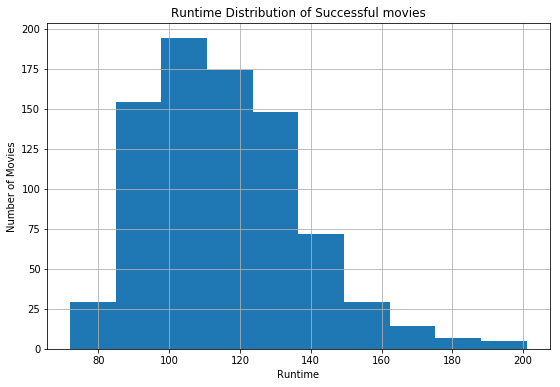

In [24]:
# Plot a histogram to see the distribution of the runtime.
plt.figure(figsize=(9,6))
suc_movie['runtime'].plot(kind='hist')
plt.grid(True)
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Runtime Distribution of Successful movies', fontsize=12);

The boxplot is shown below. From here we can see the ouliers of this distribution.

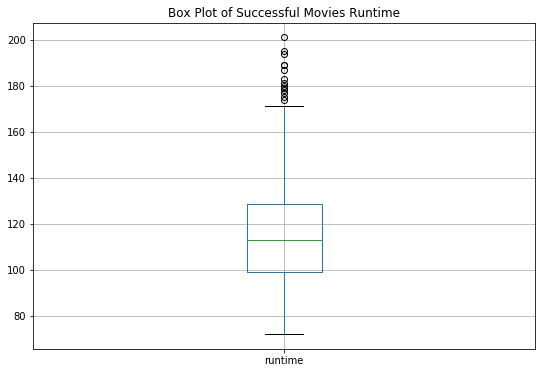

In [25]:
# Plot a boxplot to see the distribution of the runtime.
plt.figure(figsize=(9,6))
suc_movie['runtime'].plot(kind='box')
plt.grid(True)
plt.title('Box Plot of Successful Movies Runtime', fontsize=12);

Since the box plots does not give us exact values, statistical details fro the runtime is calculated as below.

In [26]:
# Statistical description of runtime
suc_movie['runtime'].describe()

count    826.000000
mean     115.628329
std       21.404868
min       72.000000
25%       99.000000
50%      113.000000
75%      128.750000
max      201.000000
Name: runtime, dtype: float64

From the visualizations we can see that the majority of the movies has the runtime ranging from about 100 minutes to about 130 minutes. From the box plots we can see that the minimum runtime value is around 70 minutes, 25 to 75% of the movies are between 100 to 130 minutes, and 50% of the movies are about 110 to 115 minutes long. Then you can confirm this by calculating using the describe method which shows you the exact values. From this the runtime characteristic is as follows.  

* __There are 25% of movies having a runtime of less than 99 minutes__
* __There are 50% of movies having a runtime of less than 113 minutes. This is also so the median of runtime.__
* __There are 75% of movies having a runtime of less than 128.75 minutes__
* __50% of movies have a runtime of between 99 minutes and 128.75 minutes__


### Research Question 4-2: Which leading cast appeared the most?

The cast column includes more than one name. I assumed that the leading cast's name will be the first to be shown. So, the extraction of the lead cast's name should be done and the value count is done to figure out who appeared the most as a leading cast.

In [27]:
# Extract the leading actor from cast column and transfer them into a new column
suc_movie['lead'] = suc_movie.cast.apply(lambda x: x.split('|')[0])

# Confirm the change 
suc_movie.head(2)

,budget,revenue,profit,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj,lead
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,137999939,1392445892,Chris Pratt
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,137999939,348161292,Tom Hardy


In [28]:
# Count the number and show  the top3
count = suc_movie.lead.value_counts().nlargest(3)
count

Tom Cruise      21
Tom Hanks       18
Adam Sandler    16
Name: lead, dtype: int64

From this result we can see that the Top 3 leading cast for a succesful movie is:  
** 1. Tom Cruise (21 appearances)**    
** 2. Tom Hanks (18 appearances)**    
** 3. Adam Sandler (16 appearances)**

### Research Question 4-3: Which genres are most filmed?

When looking at the genres column, there are multiple values which are separated by '|'. So each genres needs to be extracted and treated first so we can count them. The codes are as follows.

In [35]:
# From the given column extract all strings and separate them with '|'.
genres = suc_movie['genres'].str.cat(sep='|')

# Create a pandas Series object storing the values separately separated by '|'
genres_series = pd.Series(genres.split('|'))

# Show the top 5 genres
genres_series.value_counts().nlargest(5)

Action       317
Comedy       299
Adventure    278
Drama        264
Thriller     233
dtype: int64

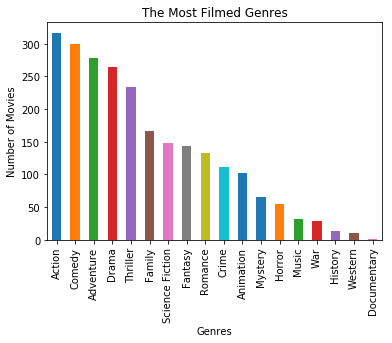

In [36]:
# plot the genres count as a bar graph
genres_series.value_counts().plot.bar()
plt.title('The Most Filmed Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()

Action, Comedy, Adventure, Drama, Thriller are the top 5 genres of movies that make \$100M or more profit. I think that we can say that movies with the combination of genres that have high number of movies will have more chance of making $100M or more profit than with the genres of low number of movies. Example will be 'Action/Adventure' movie has more chance of making higher profit than 'Western/Hisotry'.

### Question 4-3: Who directed the most?

In [38]:
# Count the number and show  the top3
count = suc_movie.director.value_counts().nlargest(3)
count

Steven Spielberg    22
Robert Zemeckis     10
Michael Bay          8
Name: director, dtype: int64

From this result we can see that the Top 3 leading directors for a succesful movie is:  
** 1. Steven Spielberg (22 movies)**    
** 2. Robert Zemeckis (10 movies)**    
** 3. Michael Bay (8 movies)**

### Question 4-3-1: What were their movies' characteristics?

These 3 directors directed total of 40 movies. So how much was the average budget for these 40 movies. Let's find out. Firt create a new dataframe which contains only the dataset of the top 3 directors. Then we will calculate the characteristics of their movies.

In [39]:
# Create new dataframe of top3 directors' movies
top3_dir_movie = suc_movie[(suc_movie['director'] == "Steven Spielberg") | (suc_movie['director'] == "Robert Zemeckis") | (suc_movie['director'] == "Michael Bay")]

# reset index
top3_dir_movie = top3_dir_movie.reset_index(drop=True)

# print first three
top3_dir_movie.head(3)

,budget,revenue,profit,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj,lead,main_genre
0,40000000,162610473,122610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,141,Thriller|Drama,2015,36799983,149601569,Tom Hanks,Thriller
1,20000000,303788635,283788635,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135,Science Fiction|Drama,1977,71955620,1092964988,Richard Dreyfuss,Science Fiction
2,200000000,325233863,125233863,A Christmas Carol,Gary Oldman|Jim Carrey|Steve Valentine|Daryl S...,Robert Zemeckis,96,Animation|Drama,2009,203280086,330567839,Gary Oldman,Animation


#### Characteristic 1: Budget

Let's see how the budget is like for the top 3 directors who directed movies with profit of $100M or more.

Maximum budget value: \$200M (see below for code)  
Minimum budget value: \$7M (see below for code)  
Average budget value: about \$79M (see code below)

In [42]:
# calculate the maximum budget value.
top3_dir_movie.budget.max()

200000000

In [43]:
# calculate the minimum budget value.
top3_dir_movie.budget.min()

7000000

In [48]:
# calculate the avrerage budget value. Rounded value
round(top3_dir_movie.budget.mean(), -6)

79000000.0

#### Characteristic 2: Cast

Who appeared the most as leading cast the most for these top 3 directors? What can we see?

In [56]:
# Description of the lead cast column
top3_dir_movie.lead.describe()

count            40
unique           27
top       Tom Hanks
freq              6
Name: lead, dtype: object

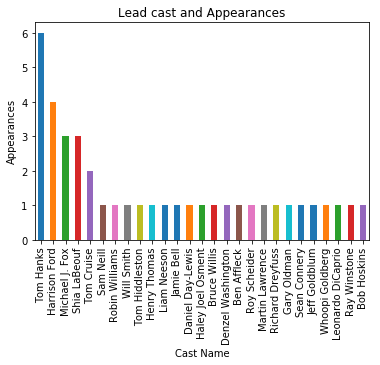

In [58]:
# Bar graph visualization of the lead cast and appearance
top3_dir_movie.lead.value_counts().plot.bar()
plt.title('Lead cast and Appearances')
plt.xlabel('Cast Name')
plt.ylabel('Appearances')
plt.show()

We can see from the results that there are 27 different lead casts and Tom Hanks appeared the most with 6 movies. Following are Harrison Ford, Michael J. Fox, Shia LaBeouf, and Tom Cruise which appeared more than once. What is really interesting is that Tom Hanks was lead cast in 18 movies which made $100M or more, and 6 movies out of those 18 are directed by one of the top 3 directors. 

### Question 5: Are there any relationship between budget and profit?

I believe that a movie is about the story and sometimes low budget movies makes profit. But when it comes to movies making a profit of $100M or more, is there any relationship between the budget and profit? Let's see what we can find out.

Use the scatter plot to see if we can see nay relationship between 'budget' and 'profit'. Also calculate the correlation coefficient between the two.

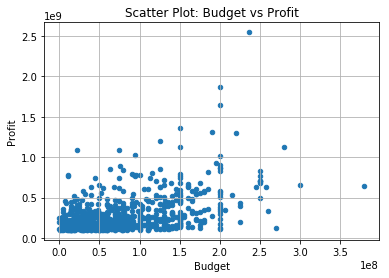

In [64]:
# Plot the budget and profit to see how they are mapped
suc_movie.plot.scatter('budget', 'profit')
plt.title("Scatter Plot: Budget vs Profit")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

In [62]:
# calculate the correlation coefficient value
suc_movie[['budget', 'profit']].corr()

,budget,profit
budget,1.000000,0.481291
profit,0.481291,1.000000


From the scatter plot and the calculations we can see that there is a positive relationship with the correlation coefficient of 0.48. But again movie is not about budget. Also you need revenue to make profit. There are other characteristics to a movie so even though there is a positive relationship, it is not guranteed.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

The initial question that I raised was the following.  
**If I wanted to make a movie and if I were to increase the chance of that movie to make profit what will I do?**   

Well...  
> Directors - Steven Spielberg, Robert Zemeckis, or Michael Bay  
Lead cast - Tom Cruise, Tom Hanks, or Adam Sandler  
Genre - Combination of Action, Comedy, Adventure, Drama, or Thriller  
Runtime - about 100 mintues to 130 minutes  
Budget - about \$79M \(since the 3 directors average is $79M)

**Limitations**  
These analysis is not guranteed.
The analysis were done without using popularity, vote count since the values were not clearly defined.  
These findings are just characteristic of movies which made significant amount of profit. Following these characteristic might give a movie a increased chance of making significant amount of profit, but still there are other influencial factors such as quality of the story itself. 